In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
seed_urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [3]:
def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
        
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [4]:
news_df = build_dataset(seed_urls)
news_df.head(10)

,news_headline,news_article,news_category
0,OnePlus launches Nord with Snapdragon 765G 5G;...,OnePlus has launched Nord smartphone with star...,technology
1,Chinese hackers who targeted COVID-19 research...,The two Chinese hackers indicted by the US for...,technology
2,US charges Chinese hackers for targeting globa...,US Justice Department has indicted 2 Chinese h...,technology
3,"Elon Musk shares new pic with son X AE A-XII, ...",SpaceX CEO Elon Musk took to Twitter to share ...,technology
4,Ensure strict compliance with ban or face acti...,Government has directed companies to ensure st...,technology
5,LinkedIn to fire 960 employees worldwide amid ...,Professional networking platform LinkedIn has ...,technology
6,"Pakistan bans Bigo Live app for vulgar videos,...",Pakistan has banned live streaming app Bigo Li...,technology
7,US blacklists 11 Chinese firms over China's tr...,The US has added 11 Chinese companies to an ex...,technology
8,Uttarakhand CM invites Google CEO Pichai to se...,Uttarakhand CM Trivendra Singh Rawat has writt...,technology
9,Tencent's model to predict risk of COVID-19 pa...,Tencent AI Lab and a group of Chinese scientis...,technology


In [5]:
news_df.news_category.value_counts()

technology    25
sports        25
world         24
Name: news_category, dtype: int64

In [6]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
#from contractions import CONTRACTION_MAP
import unicodedata

In [7]:
#nlp = spacy.load('en_vectors_web_lg', parse=True, tag=True, entity=True)
nlp = spacy.load('en', parse=True, tag=True, entity=True)
import en_core_web_sm



In [8]:
nlp = en_core_web_sm.load()

In [9]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [10]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [11]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

In [12]:
#unable to install contractions
'''
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("Y'all can't expand contractions I'd think")

'''

'\ndef expand_contractions(text, contraction_mapping=CONTRACTION_MAP):\n    \n    contractions_pattern = re.compile(\'({})\'.format(\'|\'.join(contraction_mapping.keys())), \n                                      flags=re.IGNORECASE|re.DOTALL)\n    def expand_match(contraction):\n        match = contraction.group(0)\n        first_char = match[0]\n        expanded_contraction = contraction_mapping.get(match)                                if contraction_mapping.get(match)                                else contraction_mapping.get(match.lower())                       \n        expanded_contraction = first_char+expanded_contraction[1:]\n        return expanded_contraction\n        \n    expanded_text = contractions_pattern.sub(expand_match, text)\n    expanded_text = re.sub("\'", "", expanded_text)\n    return expanded_text\n\nexpand_contractions("Y\'all can\'t expand contractions I\'d think")\n\n'

In [13]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", 
                          remove_digits=True)

'Well this was fun What do you think '

In [14]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

In [15]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

In [16]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

In [17]:
#Bringing it all together — Building a Text Normalizer
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        #if contraction_expansion:
        #    doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [18]:
# combining headline and article text
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]
news_df

,news_headline,news_article,news_category,full_text
0,OnePlus launches Nord with Snapdragon 765G 5G;...,OnePlus has launched Nord smartphone with star...,technology,OnePlus launches Nord with Snapdragon 765G 5G;...
1,Chinese hackers who targeted COVID-19 research...,The two Chinese hackers indicted by the US for...,technology,Chinese hackers who targeted COVID-19 research...
2,US charges Chinese hackers for targeting globa...,US Justice Department has indicted 2 Chinese h...,technology,US charges Chinese hackers for targeting globa...
3,"Elon Musk shares new pic with son X AE A-XII, ...",SpaceX CEO Elon Musk took to Twitter to share ...,technology,"Elon Musk shares new pic with son X AE A-XII, ..."
4,Ensure strict compliance with ban or face acti...,Government has directed companies to ensure st...,technology,Ensure strict compliance with ban or face acti...
...,...,...,...,...
69,Brazil's President Bolsonaro tests COVID-19 +v...,Brazilian President Jair Bolsonaro has tested ...,world,Brazil's President Bolsonaro tests COVID-19 +v...
70,China sent planes near Taiwan almost daily in ...,Taiwan's Foreign Minister Joseph Wu said that ...,world,China sent planes near Taiwan almost daily in ...
71,UK didn't vote for Brexit due to Russian inter...,The UK did not vote to leave the European Unio...,world,UK didn't vote for Brexit due to Russian inter...
72,Pak journalist critical of Army released after...,"Pakistani journalist Matiullah Jan, who has be...",world,Pak journalist critical of Army released after...


In [19]:
# pre-process text and store the same
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
norm_corpus


['oneplus launch nord snapdragon g g price start oneplus launch nord smartphone start price base gb ram gb storage variant make available september gb ram gb storage gb ram gb storage variant price respectively make available start august via amazon companys website oneplus nord sports qualcomm snapdragon g g processor',
 'chinese hacker target covid research college friend us two chinese hacker indict us target global covid research former classmate study computer technology electrical engineering college sichuan us say li xiaoyu dong jiazhi steal trade secret worth hundred million dollar indictment allege also help chinese government steal foreign military secret add',
 'us charge chinese hacker target global covid research us justice department indict chinese hacker steal hundred million dollar worth trade secret company across world indictment say hacker target company publicly know work develop vaccine treatment coronavirus federal prosecutor say steal information know would inter

In [20]:
# show a sample news article
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'Chinese hackers who targeted COVID-19 research were college friends: US. The two Chinese hackers indicted by the US for targeting global COVID-19 research were former classmates who studied computer technologies at an electrical engineering college in Sichuan, the US said. Li Xiaoyu and Dong Jiazhi stole trade secrets worth hundreds of millions of dollars, the indictment alleges. They also helped the Chinese government in stealing foreign military secrets, it added.',
 'clean_text': 'chinese hacker target covid research college friend us two chinese hacker indict us target global covid research former classmate study computer technology electrical engineering college sichuan us say li xiaoyu dong jiazhi steal trade secret worth hundred million dollar indictment allege also help chinese government steal foreign military secret add'}

In [21]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

In [22]:
# create a basic pre-processed corpus, don't lowercase to get POS context
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)


In [23]:
corpus

['OnePlus launches Nord Snapdragon 765G 5G ; price starts 24,999. OnePlus launched Nord smartphone starting price 24,999 base 6GB RAM/64GB storage variant made available September. 8GB RAM/128GB storage 12GB RAM/256GB storage variants priced 27,999 29,999 , respectively , made available starting August 4 via Amazon companys website. OnePlus Nord sports Qualcomm Snapdragon 765G 5G processor .',
 'Chinese hackers targeted COVID-19 research college friends : US. two Chinese hackers indicted US targeting global COVID-19 research former classmates studied computer technologies electrical engineering college Sichuan , US said. Li Xiaoyu Dong Jiazhi stole trade secrets worth hundreds millions dollars , indictment alleges. also helped Chinese government stealing foreign military secrets , added .',
 'US charges Chinese hackers targeting global COVID-19 research. US Justice Department indicted 2 Chinese hackers stealing hundreds millions dollars worth trade secrets companies across world. indic

In [24]:
# demo for POS tagging for sample news headline
sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

In [25]:
print (sentence, '\n' ,sentence_nlp )

Chinese hackers who targeted COVID-19 research were college friends: US 
 Chinese hackers who targeted COVID-19 research were college friends: US


In [26]:
# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,Chinese,JJ,ADJ
1,hackers,NNS,NOUN
2,who,WP,PRON
3,targeted,VBD,VERB
4,COVID-19,JJ,ADJ
5,research,NN,NOUN
6,were,VBD,AUX
7,college,NN,NOUN
8,friends,NNS,NOUN
9,:,:,PUNCT


In [27]:
# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Chinese,JJ
1,hackers,NNS
2,who,WP
3,targeted,VBD
4,COVID-19,NNP
5,research,NN
6,were,VBD
7,college,NN
8,friends:,NNS
9,US,VBP


In [28]:
#Shallow Parsing or Chunking
from nltk.corpus import conll2000

In [29]:
data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 

In [30]:
print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [31]:
from nltk.chunk.util import tree2conlltags, conlltags2tree


In [32]:
wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [33]:
#Named Entity Recognition
sentence = str(news_df.iloc[1].full_text)
sentence_nlp = nlp(sentence)
sentence_nlp

Chinese hackers who targeted COVID-19 research were college friends: US. The two Chinese hackers indicted by the US for targeting global COVID-19 research were former classmates who studied computer technologies at an electrical engineering college in Sichuan, the US said. Li Xiaoyu and Dong Jiazhi stole trade secrets worth hundreds of millions of dollars, the indictment alleges. They also helped the Chinese government in stealing foreign military secrets, it added.

In [34]:
from spacy import displacy

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[(Chinese, 'NORP'), (US, 'GPE'), (two, 'CARDINAL'), (Chinese, 'NORP'), (US, 'GPE'), (Sichuan, 'GPE'), (US, 'GPE'), (Li, 'PERSON'), (Xiaoyu, 'PERSON'), (Dong, 'PERSON'), (Jiazhi, 'PERSON'), (hundreds, 'MONEY'), (of, 'MONEY'), (millions, 'MONEY'), (of, 'MONEY'), (dollars, 'MONEY'), (Chinese, 'NORP')]


In [35]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None
entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [36]:
entity_frame

,Entity Name,Entity Type
0,"24,999",CARDINAL
1,Nord,ORG
2,"24,999",CARDINAL
3,September,DATE
4,8,CARDINAL
...,...,...
622,seven years,DATE
623,Bernama,ORG
624,June 2019,DATE
625,Najib,ORG


In [37]:
#get the top named entities
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,China,Chinese,England,India,Pakistan,IPL,Apple,Google,UK,Ben Stokes,Donald Trump,Houston,one,Twitter
Entity Type,GPE,GPE,NORP,GPE,GPE,GPE,ORG,ORG,ORG,GPE,PERSON,PERSON,GPE,CARDINAL,ORG
Frequency,33,19,14,13,12,10,9,9,7,7,6,6,5,4,4


In [38]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,GPE,ORG,PERSON,CARDINAL,DATE,NORP,ORDINAL,MONEY,PRODUCT,QUANTITY,TIME,LOC,WORK_OF_ART,LAW,FAC
Frequency,151,118,117,69,65,47,19,11,6,5,4,4,3,2,2


In [39]:
from afinn import Afinn
af = Afinn()


In [40]:
# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [41]:
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                 
                        count      mean       std   min   25%  50%   75%   max
news_category                                                                 
sports                   25.0  1.360000  5.251032 -16.0 -1.00  1.0  4.00  10.0
technology               25.0 -3.000000  5.338539 -18.0 -6.00 -1.0  1.00   3.0
world                    24.0 -4.416667  7.711745 -30.0 -7.25 -4.5  1.25   6.0

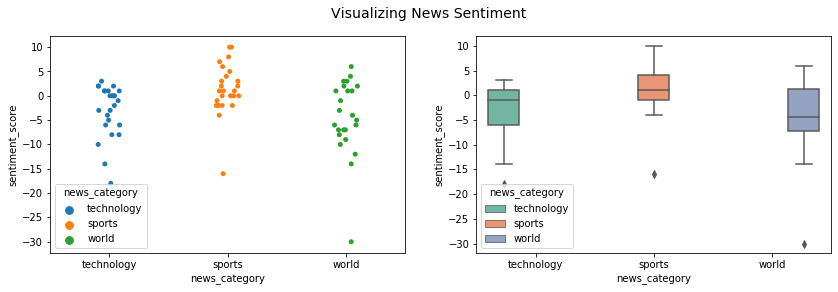

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

/Users/kmallick/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


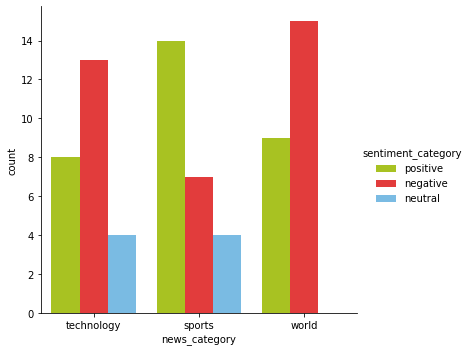

In [43]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [44]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 3)].index[0]
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -18)].index[0]


In [45]:

print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Twitter has banned thousands of QAnon conspiracy theory accounts and will stop recommending content linked to QAnon to limit the spread of offline harm. The company has already banned 7,000 accounts linked to conspiracy theories and has blocked about 150,000 more. QAnon supporters believe "deep-state" traitors are plotting against Donald Trump and have been linked to numerous other false claims. 

Most Positive Tech News Article: South Korea's largest internet portal Naver has moved backup servers storing its users' personal data in Hong Kong to Singapore. Naver said it is doing so to "better manage and protect our user data". It added that it had deleted all data stored in Hong Kong in early July. Earlier, TikTok had announced its decision to exit Hong Kong market.


In [46]:
#Sentiment Analysis with TextBlob
from textblob import TextBlob

In [47]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]


In [48]:
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                             \
                        count     mean       std    min      25%     50%   
news_category                                                              
sports                   25.0  0.17104  0.214000 -0.326  0.03300  0.1400   
technology               25.0 -0.03336  0.176191 -0.500 -0.12900 -0.0140   
world                    24.0 -0.00325  0.157082 -0.333 -0.07975 -0.0075   

                              
                   75%   max  
news_category                 
sports         0.30100  0.70  
technology     0.07100  0.25  
world          0.13375  0.30

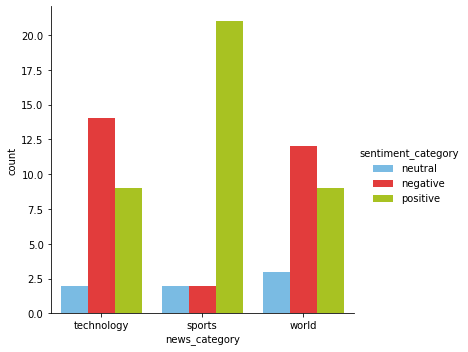

In [49]:
c = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [50]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 0.25)].index[0]
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -0.5)].index[0]

print('Most Negative technology News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive technology News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative technology News Article: Facebook has added a label to US President Donald Trump's post that said mail-in voting would lead to a "CORRUPT ELECTION". "Mail-In Voting, unless changed by the courts, will lead to the most CORRUPT ELECTION in our Nation's History! #RIGGEDELECTION," Trump wrote. Facebook's label prompted users to "get official voting info on how to vote" from government website.

Most Positive technology News Article: Apple CEO Tim Cook has announced that the company's entire business will be carbon neutral by 2030. The company plans to cut emissions by 75% by 2030 while creating innovative carbon removal solutions for the remaining footprint. Notably, Apple cut its carbon footprint by 4.3 million metric tons in 2019 by using recycled content innovations in its products.



In [51]:
from sklearn import metrics
metrics.confusion_matrix(sentiment_category, sentiment_category_tb, 
                                    labels=['negative', 'neutral', 'positive'])

array([[20,  4, 11],
       [ 4,  0,  4],
       [ 4,  3, 24]])